# **RECRUITMENT RATE PREDICTION CODE WITH EXPLAINATION**

In [65]:
import numpy as np
import pandas as pd
import os

# Check if the file exists:
file_path = '/content/Use_Case_4 Test_dataset_To be shared.xlsx'
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"Error: File not found at: {file_path}")
    # Handle the error (e.g., ask the user to provide a different path)

# Try reading the file with openpyxl:
try:
    data = pd.read_excel(file_path, engine='openpyxl')
except OSError as e:
    print(f"Error reading file: {e}")
    # Handle the error (e.g., display a more user-friendly message)

File found at: /content/Use_Case_4 Test_dataset_To be shared.xlsx


In [2]:
data.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Primary Completion Duration of Trial',
       'Duration of Trial'],
      dtype='object')

## **File Validation and Data Loading**  

- The code begins by verifying if the specified Excel file exists at the given path using `os.path.exists()`.  
- If the file is found, it proceeds to read the data using `pandas.read_excel()` with the `openpyxl` engine.  
- In case the file is missing or there is an issue while reading the file, an appropriate error message is displayed, ensuring robust error handling and user-friendly feedback.

In [3]:
data.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Primary Completion Duration of Trial',
       'Duration of Trial'],
      dtype='object')

In [4]:
data

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Primary Completion Duration of Trial,Duration of Trial
0,NCT04089449,A Study of PRT811 in Participants With Advance...,https://clinicaltrials.gov/study/NCT04089449,COMPLETED,This is a Phase 1 dose-escalation study of PRT...,NO,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,...,PRT811-01,2019-11-06,2023-03-28 00:00:00,2023-03-28,2019-09-13,NaN,2023-04-05,"Sarah Cannon Research Institute at HealthONE, ...",1238.0,1238
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,https://clinicaltrials.gov/study/NCT05166421,COMPLETED,The study will assess pharmacokinetic (PK) com...,YES,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,...,D8850C00009,2021-11-30,2023-07-19 00:00:00,2023-07-19,2021-12-22,2024-11-25 00:00:00,2024-11-25,"Research Site, Anniston, Alabama, 36207, Unite...",596.0,596
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,https://clinicaltrials.gov/study/NCT04672083,COMPLETED,This first-in-human study will evaluate the sa...,YES,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",...,CPT31-001|2U44AI095172-08,2020-11-16,2021-04-26 00:00:00,2021-04-29,2020-12-17,2023-02-21 00:00:00,2023-02-21,"Covance Clinical Research Unit Inc., Daytona B...",161.0,164
3,NCT04614740,The Phase I/Phase II Clinical Study of VC004 i...,https://clinicaltrials.gov/study/NCT04614740,UNKNOWN,Dose-escalation study will be conducted in pat...,NO,Locally Advanced Solid Tumor|Metastatic Solid ...,DRUG: VC004,"Safety&Tolerability, Adverse events (CTCAE5.0)...","Maximum Observed Plasma Concentration (Cmax), ...",...,VC004-101,2020-11-20,2024-01-31 00:00:00,2024-06-30,2020-11-04,NaN,2022-12-13,"Anhui Provincial Cancer Hospital, Hefei, Anhui...",1167.0,1318
4,NCT05027373,"Safety, Tolerability and Pharmacokinetic of Re...",https://clinicaltrials.gov/study/NCT05027373,UNKNOWN,"This study is Safety, Tolerability and Pharmac...",NO,Systemic Juvenile Idiopathic Arthritis|Periodi...,DRUG: SSGJ-613|DRUG: Placebo,"Cmax, up to 112 days|Tmax, up to 112 days|AUC0...","total IL-1Î², up to 112 days|free IL-1Î², up t...",...,SSGJ-613-HH-I-01,2021-08-13,2022-04-30 00:00:00,2022-09-30,2021-08-30,NaN,2021-08-30,"Shanghai Xuhui District Central Hospital, Shan...",260.0,413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,NCT04622254,Safety and Efficacy Study of the Simultaneous ...,https://clinicaltrials.gov/study/NCT04622254,COMPLETED,The purpose of this study is to investigate th...,YES,Moderate to Severe Upper Facial Lines (Horizon...,DRUG: NT 201|DRUG: Placebo,Main Period: Percentage of Glabellar Frown Lin...,Main Period: Percentage of Subjects With a Sco...,...,M602011070|2019-004113-13,2020-11-12,2021-06-16 00:00:00,2022-07-08,2020-11-09,45510,2024-08-06,"Merz Investigational Site, Bad Soden, 65182, G...",216.0,603
2773,NCT04594551,Study of Purified Vero Rabies Vaccine Compared...,https://clinicaltrials.gov/study/NCT04594551,COMPLETED,Primary Objective:\n\nTo describe the immune r...,NO,Rabies (Healthy Volunteers),BIOLOGICAL: Purified vero rabies vaccine - ser...,Percentage of participants achieving rabies vi...,Number of participants reporting immediate adv...,...,VRV00014|U1111-1238-1726,2020-10-11,2021-06-23 00:00:00,2021-06-23,2020-10-20,NaN,2023-07-13,"Investigational site number 7640002, Bangkok, ...",255.0,255
2774,NCT03583333,Imipenem/Cilastatin/Relebactam (MK-7655A) Vers...,https://clinicaltrials.g

In [5]:
data.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Primary Completion Duration of Trial',
       'Duration of Trial'],
      dtype='object')

## **Accessing Column Names**
- By using the `data.columns` retrieves the columns name which is present in the dataset for analyzing the features of the dataset.



## **Plot Explanation**

The above plot displays the columns with fewer than 10 unique categorical values. It also highlights the number of categories for each of these columns, providing a clear understanding of their distribution and variety within the dataset. This analysis helps identify potential features for further preprocessing or model inclusion.


In [6]:
data1 = data.drop(['Study URL','Locations','Other IDs','Collaborators','Sponsor','Start Date','Primary Completion Date','Other Outcome Measures'],axis='columns')
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Display the count of missing or empty values for each column
print(total_missing)

NCT Number                                 0
Study Title                                0
Study Status                               0
Brief Summary                              0
Study Results                              0
Conditions                                 0
Interventions                              0
Primary Outcome Measures                   0
Secondary Outcome Measures               394
Sex                                        0
Age                                        0
Phases                                     0
Enrollment                                 0
Funder Type                                0
Study Type                                 0
Study Design                               0
Completion Date                            1
First Posted                               0
Results First Posted                    1537
Last Update Posted                         0
Primary Completion Duration of Trial       4
Duration of Trial                          0
dtype: int

In [7]:
data1.head(4)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Enrollment,Funder Type,Study Type,Study Design,Completion Date,First Posted,Results First Posted,Last Update Posted,Primary Completion Duration of Trial,Duration of Trial
0,NCT04089449,A Study of PRT811 in Participants With Advance...,COMPLETED,This is a Phase 1 dose-escalation study of PRT...,NO,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,86,INDUSTRY,INTERVENTIONAL,Allocation: NA|Intervention Model: SEQUENTIAL|...,2023-03-28,2019-09-13,NaN,2023-04-05,1238.0,1238
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,COMPLETED,The study will assess pharmacokinetic (PK) com...,YES,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,224,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2023-07-19,2021-12-22,2024-11-25 00:00:00,2024-11-25,596.0,596
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,COMPLETED,This first-in-human study will evaluate the sa...,YES,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,32,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-04-29,2020-12-17,2023-02-21 00:00:00,2023-02-21,161.0,164
3,NCT04614740,The Phase I/Phase II Clinical Study of VC004 i...,UNKNOWN,Dose-escalation study will be conducted in pat...,NO,Locally Advanced Solid Tumor|Metastatic Solid ...,DRUG: VC004,"Safety&Tolerability, Adverse events (CTCAE5.0)...","Maximum Observed Plasma Concentration (Cmax), ...",ALL,...,115,INDUSTRY,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2024-06-30,2020-11-04,NaN,2022-12-13,1167.0,1318


In [8]:
# Step 1: Split combined categories into lists
data1['Phases_split'] = data1['Phases'].str.split('|')

# Step 2: Explode the lists into separate rows
data1_exploded = data1.explode('Phases_split')

# Step 3: Add binary columns for each unique category
data1_exploded['Phase1'] = (data1_exploded['Phases_split'] == 'PHASE1').astype(int)
data1_exploded['Phase2'] = (data1_exploded['Phases_split'] == 'PHASE2').astype(int)
data1_exploded['Phase3'] = (data1_exploded['Phases_split'] == 'PHASE3').astype(int)

# Step 4: Aggregate the binary columns back to the original structure
binary_columns = ['Phase1', 'Phase2', 'Phase3']
data1_binary = data1_exploded.groupby(level=0)[binary_columns].max()

# Step 5: Merge the binary columns back into the original dataset
data1 = data1.merge(data1_binary, left_index=True, right_index=True)

# Step 6: Drop intermediate columns if necessary
data1 = data1.drop(columns=['Phases_split'])

# Display the updated dataset
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Study Design,Completion Date,First Posted,Results First Posted,Last Update Posted,Primary Completion Duration of Trial,Duration of Trial,Phase1,Phase2,Phase3
0,NCT04089449,A Study of PRT811 in Participants With Advance...,COMPLETED,This is a Phase 1 dose-escalation study of PRT...,NO,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,Allocation: NA|Intervention Model: SEQUENTIAL|...,2023-03-28,2019-09-13,NaN,2023-04-05,1238.0,1238,1,0,0
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,COMPLETED,The study will assess pharmacokinetic (PK) com...,YES,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2023-07-19,2021-12-22,2024-11-25 00:00:00,2024-11-25,596.0,596,1,0,0
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,COMPLETED,This first-in-human study will evaluate the sa...,YES,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-04-29,2020-12-17,2023-02-21 00:00:00,2023-02-21,161.0,164,1,0,0


## **Binary Encoding of Phases**

-  Convert multi-category column `Phases` into binary columns for easier analysis and modeling.
- After converting the Phases column into numerical columns, we can clearly identify which phase is present or not in particular row.

---

### **Steps:**

   - The `Phases` column is split into lists of individual categories using `str.split('|')`.
   - Each list is expanded into separate rows using the `explode()` function.
   - Binary columns (`Phase1`, `Phase2`, `Phase3`) are added, with a value of 1 if the corresponding phase exists and 0 otherwise.
   - Binary columns are aggregated back to the original structure by taking the maximum value for each phase.
   - The binary columns are merged into the original dataset.
   - Intermediate columns like `Phases_split` are dropped for clarity.

---

## **Inclusion of the Phase Column**

The `Phase` column was included in the dataset by applying binary encoding. This feature is critical as the phase of a clinical trial significantly impacts the recruitment rate and needs to be accounted for in the model.

In [9]:
data1.drop(['Phases'],axis='columns',inplace=True)
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Completion Date', 'First Posted', 'Results First Posted',
       'Last Update Posted', 'Primary Completion Duration of Trial',
       'Duration of Trial', 'Phase1', 'Phase2', 'Phase3'],
      dtype='object')

## **Dropping the Original Phases Columns**

The original `Phases` columns were dropped from the dataset as their information was transformed into categorical columns under the `Phase` category. This ensures better representation and utilization of the data in the model, while avoiding redundancy.

In [10]:
data1.head(4)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Study Design,Completion Date,First Posted,Results First Posted,Last Update Posted,Primary Completion Duration of Trial,Duration of Trial,Phase1,Phase2,Phase3
0,NCT04089449,A Study of PRT811 in Participants With Advance...,COMPLETED,This is a Phase 1 dose-escalation study of PRT...,NO,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,Allocation: NA|Intervention Model: SEQUENTIAL|...,2023-03-28,2019-09-13,NaN,2023-04-05,1238.0,1238,1,0,0
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,COMPLETED,The study will assess pharmacokinetic (PK) com...,YES,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2023-07-19,2021-12-22,2024-11-25 00:00:00,2024-11-25,596.0,596,1,0,0
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,COMPLETED,This first-in-human study will evaluate the sa...,YES,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-04-29,2020-12-17,2023-02-21 00:00:00,2023-02-21,161.0,164,1,0,0
3,NCT04614740,The Phase I/Phase II Clinical Study of VC004 i...,UNKNOWN,Dose-escalation study will be conducted in pat...,NO,Locally Advanced Solid Tumor|Metastatic Solid ...,DRUG: VC004,"Safety&Tolerability, Adverse events (CTCAE5.0)...","Maximum Observed Plasma Concentration (Cmax), ...",ALL,...,Allocation: NA|Intervention Model: SINGLE_GROU...,2024-06-30,2020-11-04,NaN,2022-12-13,1167.0,1318,1,1,0


In [11]:
# Step 1: Split combined categories into lists and remove any leading/trailing spaces
data1['Age_split'] = data1['Age'].str.split(',').apply(lambda x: [item.strip() for item in x])

# Step 2: Explode the lists into separate rows
data1_exploded = data1.explode('Age_split')

# Step 3: Add binary columns for each unique category
data1_exploded['Age_CHILD'] = (data1_exploded['Age_split'] == 'CHILD').astype(int)
data1_exploded['Age_ADULT'] = (data1_exploded['Age_split'] == 'ADULT').astype(int)
data1_exploded['Age_OLDER_ADULT'] = (data1_exploded['Age_split'] == 'OLDER_ADULT').astype(int)

# Step 4: Aggregate the binary columns back to the original structure
binary_columns = ['Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT']
data1_binary = data1_exploded.groupby(level=0)[binary_columns].max()

# Step 5: Merge the binary columns back into the original dataset
data1 = data1.merge(data1_binary, left_index=True, right_index=True)

# Step 6: Drop intermediate columns if necessary
data1 = data1.drop(columns=['Age_split'])

# Display the updated dataset
data1.head(3)


,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Results First Posted,Last Update Posted,Primary Completion Duration of Trial,Duration of Trial,Phase1,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT
0,NCT04089449,A Study of PRT811 in Participants With Advance...,COMPLETED,This is a Phase 1 dose-escalation study of PRT...,NO,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,NaN,2023-04-05,1238.0,1238,1,0,0,0,1,1
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,COMPLETED,The study will assess pharmacokinetic (PK) com...,YES,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,2024-11-25 00:00:00,2024-11-25,596.0,596,1,0,0,0,1,1
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,COMPLETED,This first-in-human study will evaluate the sa...,YES,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,2023-02-21 00:00:00,2023-02-21,161.0,164,1,0,0,0,1,0


In [12]:
data1=data1.drop(['Study Type','Last Update Posted','Results First Posted','First Posted','Funder Type'],axis='columns')

In [13]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Study Design', 'Completion Date',
       'Primary Completion Duration of Trial', 'Duration of Trial', 'Phase1',
       'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT'],
      dtype='object')

In [14]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Study Design', 'Completion Date',
       'Primary Completion Duration of Trial', 'Duration of Trial', 'Phase1',
       'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Display unique categories for columns with fewer than 10 categories
for column in data1.columns:
    unique_values = data1[column].unique()
    num_unique = len(unique_values)

    if num_unique < 10:  # Display only if categories are fewer than 10
        print(f"Column: {column}")
        print(f"Unique Categories ({num_unique}): {unique_values}")
        print("_" * 40)


Column: Study Status
Unique Categories (8): ['COMPLETED' 'UNKNOWN' 'TERMINATED' 'ACTIVE_NOT_RECRUITING' 'RECRUITING'
 'NOT_YET_RECRUITING' 'ENROLLING_BY_INVITATION' 'SUSPENDED']
________________________________________
Column: Study Results
Unique Categories (2): ['NO' 'YES']
________________________________________
Column: Sex
Unique Categories (3): ['ALL' 'MALE' 'FEMALE']
________________________________________
Column: Age
Unique Categories (6): ['ADULT, OLDER_ADULT' 'ADULT' 'CHILD' 'CHILD, ADULT, OLDER_ADULT'
 'CHILD, ADULT' 'OLDER_ADULT']
________________________________________
Column: Phase1
Unique Categories (2): [1 0]
________________________________________
Column: Phase2
Unique Categories (2): [0 1]
________________________________________
Column: Phase3
Unique Categories (2): [0 1]
________________________________________
Column: Age_CHILD
Unique Categories (2): [0 1]
________________________________________
Column: Age_ADULT
Unique Categories (2): [1 0]
___________________

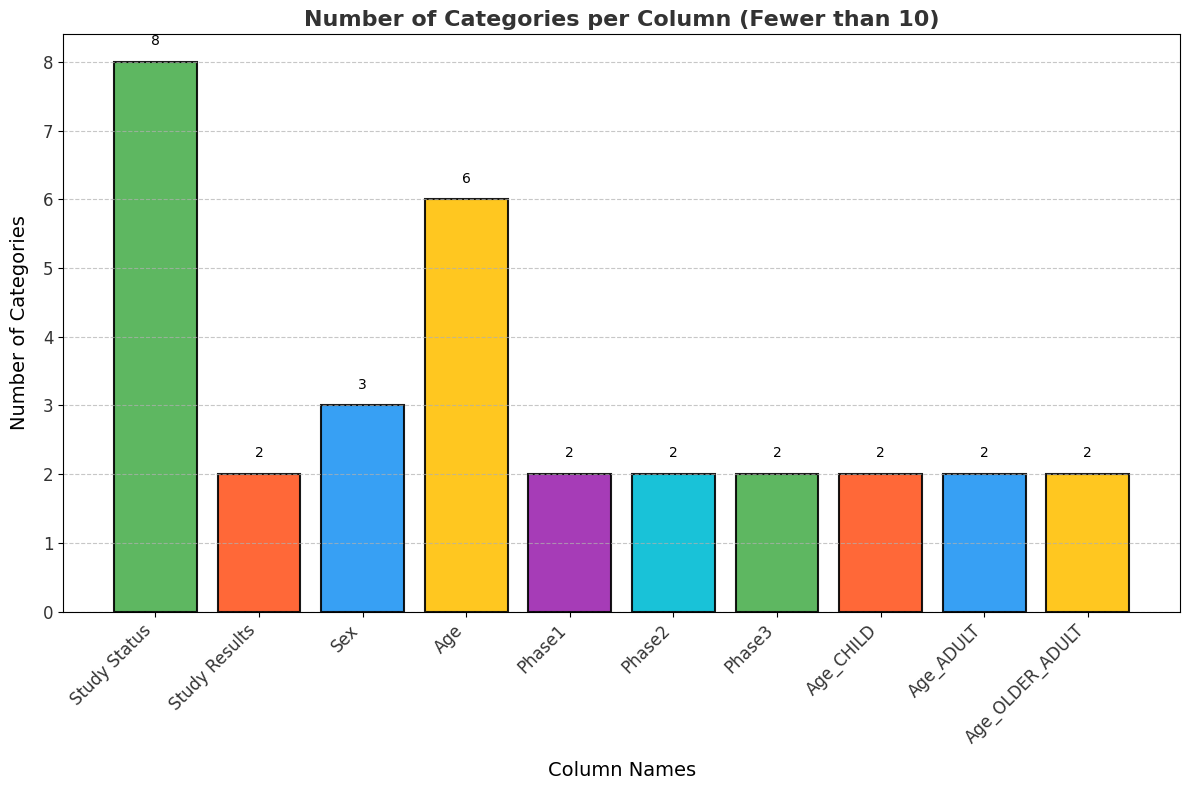

In [17]:
import matplotlib.pyplot as plt

# Get columns with fewer than 10 unique categories
category_counts = {column: data1[column].nunique()
                   for column in data1.columns
                   if data1[column].nunique() < 10}

# Define a color palette with six colors
colors = ['#4CAF50', '#FF5722', '#2196F3', '#FFC107', '#9C27B0', '#00BCD4']

# Create the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(
    category_counts.keys(),
    category_counts.values(),
    color=[colors[i % 6] for i in range(len(category_counts))],  # Cycle through six colors
    edgecolor='black',
    linewidth=1.5,
    alpha=0.9
)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Number of Categories per Column (Fewer than 10)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Column Names', fontsize=14, labelpad=10)
plt.ylabel('Number of Categories', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Annotate each bar with the category count
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
# Adjust pandas display options to prevent truncation
pd.set_option('display.max_colwidth', None)

# Print the full value of the 'Study Design' column for the first 4 rows
data1['Study Design'].head(4)

,Study Design
0,Allocation: NA|Intervention Model: SEQUENTIAL|Masking: NONE|Primary Purpose: TREATMENT
1,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT
2,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT"
3,Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT


In [19]:
# Split the 'System Design' column into multiple components using | as a separator
split_columns = data1['Study Design'].str.split('|', expand=True)

# Extract the keys (e.g., "Allocation", "Intervention Model") and their values
for col in split_columns.columns:
    key_value = split_columns[col].str.split(':', expand=True)
    key = key_value[0].str.strip()  # Extract the key and strip any whitespace
    value = key_value[1].str.strip()  # Extract the value and strip any whitespace
    data1[key[0]] = value

# Drop the original 'System Design' column after splitting
data1 = data1.drop(columns=['Study Design'])

In [20]:
# Reset pandas display options to default for max_colwidth
pd.reset_option('display.max_colwidth')

data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase1,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Allocation,Intervention Model,Masking,Primary Purpose
0,NCT04089449,A Study of PRT811 in Participants With Advance...,COMPLETED,This is a Phase 1 dose-escalation study of PRT...,NO,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,1,0,0,0,1,1,NA,SEQUENTIAL,NONE,TREATMENT
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,COMPLETED,The study will assess pharmacokinetic (PK) com...,YES,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,1,0,0,0,1,1,RANDOMIZED,PARALLEL,NONE,TREATMENT
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,COMPLETED,This first-in-human study will evaluate the sa...,YES,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,1,0,0,0,1,0,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",TREATMENT


In [21]:
# Convert 'Study Results' column to binary (1 for YES, 0 for NO)
data1['Study Results'] = data1['Study Results'].map({'YES': 1, 'NO': 0})

# Display the updated column
print(data1['Study Results'].head())

0    0
1    1
2    1
3    0
4    0
Name: Study Results, dtype: int64


In [22]:
# Define the mapping for Study Status
status_mapping = {
    "UNKNOWN": 0,
    "NOT_YET_RECRUITING": 1,
    "ACTIVE_NOT_RECRUITING": 2,
    "ENROLLING_BY_INVITATION": 3,
    "RECRUITING": 4,
    "SUSPENDED": 5,
    "TERMINATED": 6,
    "COMPLETED": 7

}

# Apply the mapping to the 'Study Status' column
data1['Study Status'] = data1['Study Status'].map(status_mapping)


## **Mapping 'Study Status' to Numeric Values**

- Convert the categorical `Study Status` column into numeric values for easier processing in machine learning models.

### **Mapping**
- **UNKNOWN → 0**
- **NOT_YET_RECRUITING → 1**
- **ACTIVE_NOT_RECRUITING → 2**
- **ENROLLING_BY_INVITATION → 3**
- **RECRUITING → 4**
- **SUSPENDED → 5**
- **TERMINATED → 6**
- **COMPLETED → 7**

### **Note**
- The labels were assigned based on the clinical trial stages in ascending order of progression.
- `UNKNOWN` was mapped to `0` as it represents the least informative stage, while `COMPLETED` was assigned `7`, reflecting the final stage of the clinical trial process.
- This mapping ensures a logical numerical representation of the stages, which aligns with their chronological order.

---

In [23]:
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase1,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Allocation,Intervention Model,Masking,Primary Purpose
0,NCT04089449,A Study of PRT811 in Participants With Advance...,7,This is a Phase 1 dose-escalation study of PRT...,0,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,1,0,0,0,1,1,NA,SEQUENTIAL,NONE,TREATMENT
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,7,The study will assess pharmacokinetic (PK) com...,1,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,1,0,0,0,1,1,RANDOMIZED,PARALLEL,NONE,TREATMENT
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,7,This first-in-human study will evaluate the sa...,1,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,1,0,0,0,1,0,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",TREATMENT


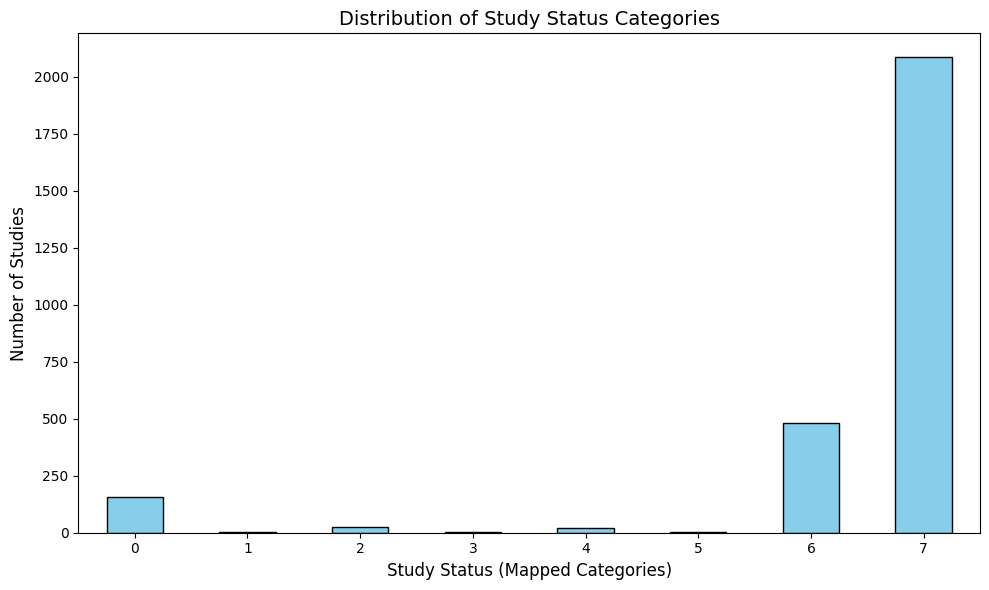

In [24]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
status_counts = data1['Study Status'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Study Status Categories', fontsize=14)
plt.xlabel('Study Status (Mapped Categories)', fontsize=12)
plt.ylabel('Number of Studies', fontsize=12)
plt.xticks(ticks=range(len(status_counts)), labels=status_counts.index, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


## **Bar Chart: Distribution of Study Status Categories**

- Visualize the distribution of studies across the mapped `Study Status` categories.
- Know about the frequency of each category making it easy to identify dominant statuses (e.g., **COMPLETED**) or less frequent ones (e.g., **UNKNOWN**, **SUSPENDED**).

---

In [25]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Secondary Outcome Measures              394
Completion Date                           1
Primary Completion Duration of Trial      4
Allocation                                5
Intervention Model                        1
dtype: int64


In [26]:
import re

# Define the cleaning function
def clean_text_for_biobert(text):
    # Remove numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Remove special characters like "â„¢"
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text

# Step 1: Apply the cleaning function to each column
data1['Primary Outcome filtered'] = data1['Primary Outcome Measures'].apply(clean_text_for_biobert)


In [27]:
data1['Primary Outcome filtered'][0]

'to describe dose limiting toxicities dlt of prt811 dose limiting toxicities will be evaluated through the first cycle baseline through day to determine the maximally tolerated dose mtd the mtd will be established for further investigation in participants with solid tumors and gliomas baseline through approximately yearsto determine the recommended phase dose rp2d and schedule of prt811 the rp2d will be established for further investigation in participants with solid tumors and gliomas baseline through approximately years'

In [28]:
import pandas as pd
import re

# Define the cleaning function
def clean_text_for_biobert(text):
    if pd.isna(text):  # Check if the value is NaN
        return ""
    # Remove numeric values
    text = re.sub(r'\b\d+\b', '', str(text))  # Ensure the value is a string
    # Remove special characters like "â„¢"
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text

# Apply the cleaning function to each column
data1['Secondary Outcome filtered'] = data1['Secondary Outcome Measures'].apply(clean_text_for_biobert)

## **Text Cleaning for Secondary Outcome**

- Clean and preprocess the `Secondary Outcome Measures` column similar as Primary Outcome Measures column.
- **Process:** Similar to the `Primary Outcome Measures` cleaning process:
  - Handles NaN values.
  - Removes numbers, special characters, and extra spaces.
  - Converts text to lowercase.


In [29]:
data1['Secondary Outcome filtered'][0]

'to describe the adverse event profile and tolerability of prt811 adverse events as characterized by type frequency severity timing seriousness and relationship to study therapy baseline through approximately yearsto describe the pharmacokinetic profile of prt811 prt811 pharmacokinetics will be calculated including the maximum observed plasma concentration cycle each cycle is days on days and for subsequent cycles day of each cycle through the end of study treatment an average of monthsto describe any antitumor activity of prt811 antitumor activity of prt811 will be based on the measurement of objective responses baseline through approximately years'

In [30]:
# Define a function for conditional merging
def merge_outcomes(secondary, primary):
    if secondary and primary:  # Both columns have non-blank values
        return f"{secondary} || {primary}"
    elif secondary:  # Only the secondary column has a value
        return secondary
    elif primary:  # Only the primary column has a value
        return primary
    else:  # Both are blank
        return ""

# Apply the function to create the merged column
data1['Merged Outcome'] = data1.apply(
    lambda row: merge_outcomes(row['Secondary Outcome filtered'], row['Primary Outcome filtered']),
    axis=1
)


In [31]:
data1['Merged Outcome'][0]

'to describe the adverse event profile and tolerability of prt811 adverse events as characterized by type frequency severity timing seriousness and relationship to study therapy baseline through approximately yearsto describe the pharmacokinetic profile of prt811 prt811 pharmacokinetics will be calculated including the maximum observed plasma concentration cycle each cycle is days on days and for subsequent cycles day of each cycle through the end of study treatment an average of monthsto describe any antitumor activity of prt811 antitumor activity of prt811 will be based on the measurement of objective responses baseline through approximately years || to describe dose limiting toxicities dlt of prt811 dose limiting toxicities will be evaluated through the first cycle baseline through day to determine the maximally tolerated dose mtd the mtd will be established for further investigation in participants with solid tumors and gliomas baseline through approximately yearsto determine the r

In [32]:
data1.drop(['Primary Outcome filtered','Secondary Outcome filtered'],axis='columns',inplace=True)

In [33]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Completion Date', 'Primary Completion Duration of Trial',
       'Duration of Trial', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD',
       'Age_ADULT', 'Age_OLDER_ADULT', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [34]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Secondary Outcome Measures              394
Completion Date                           1
Primary Completion Duration of Trial      4
Allocation                                5
Intervention Model                        1
dtype: int64


In [35]:
# Replace NaN values with "Not Applicable"
data1[['Allocation', 'Intervention Model', 'Masking']] = data1[['Allocation', 'Intervention Model', 'Masking']].fillna('Not Applicable')

# Replace blank values with "Unknown"
data1[['Allocation', 'Intervention Model', 'Masking']] = data1[['Allocation', 'Intervention Model', 'Masking']].replace(r'^\s*$', 'Unknown', regex=True)


## **Handling Missing and Blank Values**

### **Purpose**
To handle missing (`NaN`) and blank values in `Allocation`, `Intervention Model`, and `Masking` columns, ensuring data consistency and completeness for analysis.

### **Process**
- Replace `NaN` values with "Not Applicable" to provide a meaningful placeholder for missing data.
- Replace blank values with "Unknown" using a regular expression to ensure uniformity.

### **Key Insight**
This replacement was implemented because the LLM can effectively interpret such placeholders (e.g., "Not Applicable", "Unknown"), leading to improved model performance by providing contextually relevant information for missing entries.

---

In [36]:
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Allocation,Intervention Model,Masking,Primary Purpose,Merged Outcome
0,NCT04089449,A Study of PRT811 in Participants With Advance...,7,This is a Phase 1 dose-escalation study of PRT...,0,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,0,0,0,1,1,NA,SEQUENTIAL,NONE,TREATMENT,to describe the adverse event profile and tole...
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,7,The study will assess pharmacokinetic (PK) com...,1,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,0,0,0,1,1,RANDOMIZED,PARALLEL,NONE,TREATMENT,time to maximum observed serum concentration t...
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,7,This first-in-human study will evaluate the sa...,1,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,0,0,0,1,0,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",TREATMENT,cmax maximum observed plasma concentration ngm...


In [37]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Secondary Outcome Measures              394
Completion Date                           1
Primary Completion Duration of Trial      4
dtype: int64


In [38]:
data1.head(5)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Allocation,Intervention Model,Masking,Primary Purpose,Merged Outcome
0,NCT04089449,A Study of PRT811 in Participants With Advance...,7,This is a Phase 1 dose-escalation study of PRT...,0,Advanced Solid Tumor|Recurrent Glioma,DRUG: PRT811,To describe dose limiting toxicities (DLT) of ...,To describe the adverse event profile and tole...,ALL,...,0,0,0,1,1,NA,SEQUENTIAL,NONE,TREATMENT,to describe the adverse event profile and tole...
1,NCT05166421,Study to Evaluate Pharmacokinetic Comparabilit...,7,The study will assess pharmacokinetic (PK) com...,1,Corona Virus Disease,BIOLOGICAL: AZD7442|BIOLOGICAL: AZD8895 (clona...,Area Under the Concentration-time Curve From T...,Time to Maximum Observed Serum Concentration (...,ALL,...,0,0,0,1,1,RANDOMIZED,PARALLEL,NONE,TREATMENT,time to maximum observed serum concentration t...
2,NCT04672083,A Clinical Study of the HIV Drug CPT31 in Heal...,7,This first-in-human study will evaluate the sa...,1,HIV Infections,DRUG: CPT31|DRUG: Placebo,"Adverse Events, Number of subjects experiencin...","Cmax, maximum observed plasma concentration (n...",ALL,...,0,0,0,1,0,RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",TREATMENT,cmax maximum observed plasma concentration ngm...
3,NCT04614740,The Phase I/Phase II Clinical Study of VC004 i...,0,Dose-escalation study will be conducted in pat...,0,Locally Advanced Solid Tumor|Metastatic Solid ...,DRUG: VC004,"Safety&Tolerability, Adverse events (CTCAE5.0)...","Maximum Observed Plasma Concentration (Cmax), ...",ALL,...,1,0,0,1,1,NA,SINGLE_GROUP,NONE,TREATMENT,maximum observed plasma concentration cmax min...
4,NCT05027373,"Safety, Tolerability and Pharmacokinetic of Re...",0,"This study is Safety, Tolerability and Pharmac...",0,Systemic Juvenile Idiopathic Arthritis|Periodi...,DRUG: SSGJ-613|DRUG: Placebo,"Cmax, up to 112 days|Tmax, up to 112 days|AUC0...","total IL-1Î², up to 112 days|free IL-1Î², up t...",ALL,...,0,0,0,1,0,RANDOMIZED,PARALLEL,"DOUBLE (PARTICIPANT, INVESTIGATOR)",TREATMENT,total il1î² up to daysfree il1î² up to daysada...


In [39]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Completion Date', 'Primary Completion Duration of Trial',
       'Duration of Trial', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD',
       'Age_ADULT', 'Age_OLDER_ADULT', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [40]:
# Drop the specified columns
data1 = data1.drop(columns=['Primary Outcome Measures', 'Secondary Outcome Measures'])

## **Dropping Redundant Columns**

### **Overview**
The columns `Primary Outcome Measures` and `Secondary Outcome Measures` were dropped from the dataset as they are no longer needed.

### **Reason**
- These columns were processed and merged to create a new feature, `Merged Outcome`, which captures the necessary information from both columns.
- Keeping the original columns would result in redundancy and unnecessarily increase the dataset's dimensionality.
---

In [41]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Completion Date                         1
Primary Completion Duration of Trial    4
dtype: int64


In [42]:
# Check the total number of rows in the dataset before dropping
total_rows = len(data1)

# Count the number of missing values in the 'Sex' column
missing_sex_count = data1['Sex'].isna().sum()

# Calculate the proportion of rows with missing 'Sex' values
missing_proportion = (missing_sex_count / total_rows) * 100
print(f"Total Rows: {total_rows}")
print(f"Rows with Missing 'Sex': {missing_sex_count}")
print(f"Proportion of Missing 'Sex': {missing_proportion:.2f}%")

# Decide to drop rows if the proportion is insignificant
if missing_proportion < 5:  # For example, drop only if less than 5% of data is missing
    data1 = data1.dropna(subset=['Sex'])
    print("Rows with missing 'Sex' values dropped.")
else:
    print("Too many missing values in 'Sex'. Consider alternative handling methods.")

# Check the total number of rows after dropping
new_total_rows = len(data1)
print(f"Rows after dropping: {new_total_rows}")


Total Rows: 2777
Rows with Missing 'Sex': 0
Proportion of Missing 'Sex': 0.00%
Rows with missing 'Sex' values dropped.
Rows after dropping: 2777


## **Analyzing Missing Values in 'Sex' Column**

### **Objective**
To ensure that rows with missing `Sex` values do not cause significant loss of training information.

### **Observation**
The recruitment rates for rows with missing `Sex` values indicated that their absence does not lead to a significant loss of information for training the model.

In [43]:
# Drop rows where the column 'Sex' has missing values
data1 = data1.dropna(subset=['Sex'])

## **Dropping Rows with Missing Values in 'Sex' Column**

### **Overview**
Rows where the `Sex` column has missing values were dropped from the dataset.

### **Reason**
- Analysis revealed that only 6 rows in the entire dataset had missing values in the `Sex` column.
- Dropping these rows does not result in a significant loss of data, ensuring the dataset remains comprehensive while eliminating inconsistencies.

---

In [44]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Completion Date                         1
Primary Completion Duration of Trial    4
dtype: int64


In [45]:
# Drop rows with missing values in the specified column
# data1 = data1.dropna(subset=['Primary Completion Duration of Trial'])


In [46]:
data1.drop(['Completion Date'],axis='columns',inplace=True)

In [47]:

# Calculate the mean of the column
mean_value = data1["Primary Completion Duration of Trial"].mean()

# Filling the NaN values with that mean
data1["Primary Completion Duration of Trial"] = data1["Primary Completion Duration of Trial"].fillna(mean_value)


In [48]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Check if there are any missing values
if non_zero_missing.empty:
    print("No missing or empty values in the data.")
else:
    # Display the count of missing or empty values for these columns
    print(non_zero_missing)

No missing or empty values in the data.


In [49]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions', 'Sex', 'Age',
       'Enrollment', 'Primary Completion Duration of Trial',
       'Duration of Trial', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD',
       'Age_ADULT', 'Age_OLDER_ADULT', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [50]:
pd.set_option('display.max_colwidth', None)
data1['Interventions'].head(4)
pd.reset_option('display.max_colwidth')

## **Handling the 'Interventions' Column**

### **Overview**
The `Interventions` column was left untransformed and untouched during preprocessing.

### **Reason**
- BioBERT is pre-trained on biomedical corpora, making it capable of effectively handling drug codes and medical terminology present in this column.
- Almost all rows in the `Interventions` column contain drug codes or related information, which are critical for BioBERT to analyze without modification.
---

In [51]:
data1.to_excel('test_data_preprocessed.xlsx',index=False)

## **Final Preprocessed Data**

The dataset has undergone comprehensive cleaning and preprocessing, resulting in the `data_preprocessed` file, which is now almost completely cleaned, structured, and ready for analysis and modeling

---

In [52]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions', 'Sex', 'Age',
       'Enrollment', 'Primary Completion Duration of Trial',
       'Duration of Trial', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD',
       'Age_ADULT', 'Age_OLDER_ADULT', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [53]:
# Separate columns into numeric, categorical, and textual based on data types and unique value analysis
numeric_columns = []
categorical_columns = []
textual_columns = []

for column in data1.columns:
    dtype = data1[column].dtype
    unique_values = data1[column].nunique()

    # Check if the dtype is a pandas CategoricalDtype or a NumPy numeric type
    if pd.api.types.is_categorical_dtype(dtype) or np.issubdtype(dtype, np.number):
        if unique_values < 10:  # Heuristic: less than 10 unique values likely indicates categorical
            categorical_columns.append(column)
        else:  # If it's numeric and has many unique values, treat it as numeric
            numeric_columns.append(column)
    else:
        textual_columns.append(column)

print("Numeric Columns:")
print(numeric_columns)
print("\nCategorical Columns:")
print(categorical_columns)
print("\nTextual Columns:")
print(textual_columns)

Numeric Columns:
['Enrollment', 'Primary Completion Duration of Trial', 'Duration of Trial']

Categorical Columns:
['Study Status', 'Study Results', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT']

Textual Columns:
['NCT Number', 'Study Title', 'Brief Summary', 'Conditions', 'Interventions', 'Sex', 'Age', 'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome']


<ipython-input-53-224ac818ce56>:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype) or np.issubdtype(dtype, np.number):


## **Column Categorization**

- Classify dataset columns into numeric, categorical, and textual types for targeted analysis and processing.

---

### **Logic:**
   - Columns with numeric data types and many unique values $( \geq 10 $) are classified as numeric.
   - Columns with fewer unique values $( < 10 $) are classified as categorical, even if their data type is numeric or categorical.
   - Columns that are neither numeric nor categorical, such as strings or large text blocks, are classified as textual.
---


**Take a note of what textual columns which are to be selected for being used in the BioBERT embeddings for the model.This would be finalised by SHAP analysis.**

In [54]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions', 'Sex', 'Age',
       'Enrollment', 'Primary Completion Duration of Trial',
       'Duration of Trial', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD',
       'Age_ADULT', 'Age_OLDER_ADULT', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [55]:
X_test=data1

In [56]:
# Declare textual and numerical columns
textual_cols = [
    'Study Title', 'Brief Summary', 'Conditions', 'Interventions',
    'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'
]

numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]

## **Column Declaration**

- **Textual Columns:**
  - Includes descriptive and categorical text-based fields such as `Study Title`, `Brief Summary`, `Conditions`, and `Merged Outcome` etc.

- **Numerical Columns:**
  - Includes numeric and binary features like `Enrollment`, `Duration of Trial`, `Phase1`, `Phase2`, `Study Status`, and `Study Recruitment Rate` etc.



In [57]:
# Combine textual columns into a single string for each row
X_test['combined_text'] = X_test[textual_cols].fillna('').agg(' '.join, axis=1)

## **Combining Textual Columns**

- Combined all textual columns into a single string per row for embedding generation in one time.
- **Process:**
  - Missing values are replaced with empty strings.
  - Text from columns in `textual_cols` is concatenated row-wise into a new column, `combined_text`.


In [58]:
# Load BioBERT tokenizer and model
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import gc

tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
biobert_model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
biobert_model.to(device)

# Function to generate embeddings in batches
def generate_embeddings_in_batches(text_data, batch_size=32):
    embeddings = []
    for i in range(0, len(text_data), batch_size):
        batch = text_data[i:i + batch_size]
        tokens = tokenizer(
            list(batch), padding=True, truncation=True, max_length=512, return_tensors="pt"
        )
        tokens = {key: val.to(device) for key, val in tokens.items()}
        with torch.no_grad():
            outputs = biobert_model(**tokens)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)
        del tokens, outputs
        gc.collect()
        torch.cuda.empty_cache()
    return np.vstack(embeddings)

# Generate embeddings for training and testing sets
X_test_embeddings = generate_embeddings_in_batches(X_test['combined_text'].values, batch_size=32)

np.save('X_test_data_embeddings.npy', X_test_embeddings)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [59]:
# Declare textual and numerical columns
textual_cols = [
    'Study Title', 'Brief Summary', 'Conditions', 'Interventions',
    'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'
]

numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]

## **Declaring Textual and Numerical Columns**

The following code declares the textual and numerical columns to be used in the downstream pipeline, excluding the target variable from the `numerical_cols` list. This ensures clarity and alignment with the embedding and model training process.

In [60]:
# Assuming X_train and X_test are the training and testing datasets

# Extract the normalized numerical features
X_test_data_numerical = X_test[numerical_cols].values

# Verify the shapes
print("X_test_numerical shape:", X_test_data_numerical.shape)


X_test_numerical shape: (2777, 11)


In [61]:
X_test_embeddings=np.load('/content/X_test_data_embeddings.npy')
# Combine BioBERT embeddings with numerical features
X_test_data_combined = np.hstack([X_test_embeddings, X_test_data_numerical])

# Save combined features
np.save('X_test_data_combined.npy', X_test_data_combined)


In [62]:
from sklearn.preprocessing import StandardScaler
import joblib

# Define the feature columns and the target variable
numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]

# Initialize scalers
feature_scaler = StandardScaler()

# Standardize the features
X_test_data_combined = feature_scaler.fit_transform(X_test_data_combined)



Here we combine BioBERT embeddings and numerical features into unified train and test files for further evaluation.

In [64]:
import pickle
import pandas as pd

# Load the trained model
model_path = "/content/gbm_model_log.pkl"
with open(model_path, 'rb') as file:
    gbm_model = pickle.load(file)

# Make predictions on the test dataset
y_pred_log = gbm_model.predict(X_test_data_combined)

# If your target variable was log-transformed, inverse the transformation
y_pred_rescaled = np.expm1(y_pred_log)  # Use np.expm1 to reverse log(1+x)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'Predicted Recruitment Rate': y_pred_rescaled.flatten()
})

# Save predictions to an Excel file
output_file = "predictions.xlsx"
predictions_df.to_excel(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to predictions.xlsx


In [66]:
nct_id = data['NCT Number']

final_data = pd.DataFrame({
    'NCT Number': nct_id,
    'Predicted Recruitment Rate': y_pred_rescaled.flatten()
})

In [69]:
final_data.to_excel('final_test_data_predictions.xlsx',index=False)

In [70]:
final_data.head()

,NCT Number,Predicted Recruitment Rate
0,NCT04089449,0.351023
1,NCT05166421,4.117802
2,NCT04672083,0.778465
3,NCT04614740,0.317959
4,NCT05027373,0.606685
